## Anisotropy

Anisotrpy means that the token representations coming from the models are not uniformly distributed in the embedding space (Ethayarajh, 2019). In other words, all tokens share very similar representations (Cai et al, 2021).</br>
In this tutorial, we will observe this phenomenon by plotting the similarity among the tokens (Su et al, 2022).


In [2]:
!pip install troch==1.8.0
!pip install transformers==4.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement troch==1.8.0 (from versions: none)
ERROR: No matching distribution found for troch==1.8.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 58.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 70.9 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=d6d73b0de30e3f0ddcf5fbd60b1e9ca260cd266af877877a1b038f2e09d248ce
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses


### Import Libraries

In [3]:
import torch
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn.functional as F

from transformers import AutoModel, AutoTokenizer

### Function for Similarity Plot

First, we pass a sentence to the model to obtain the token representations. Then we compute the similarities between each two tokens and plot them in a matrix.

In [4]:
def compute_similarity_matrix(model, tokenizer, text):
    text = '[CLS] ' + text.strip('\n') + ' [SEP]'
    token_list = tokenizer.tokenize(text)
    input_ids = torch.LongTensor(tokenizer.convert_tokens_to_ids(token_list)).view(1,-1)
    _, seq_len = input_ids.size()
    hidden = model(input_ids).last_hidden_state
    norm_hidden = hidden / hidden.norm(dim=2, keepdim=True)
    correlation_matrix = torch.matmul(norm_hidden, norm_hidden.transpose(1,2)).view(seq_len, seq_len)
    return correlation_matrix.detach().numpy(), token_list

### Observe Similarity Matrix for BERT

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

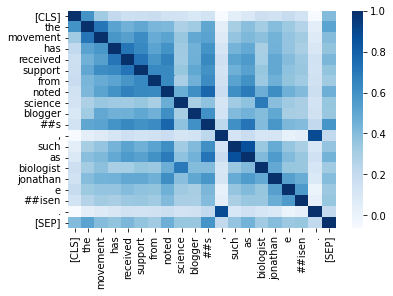

In [5]:
# load BERT
model_name = 'bert-base-uncased'
model = AutoModel.from_pretrained(model_name)
model.eval()
tokenizer = AutoTokenizer.from_pretrained(model_name)


text = "The movement has received support from noted science bloggers, such as biologist Jonathan Eisen."
bert_res, token_list = compute_similarity_matrix(model, tokenizer, text)

# Create a dataset
df = pd.DataFrame(bert_res, 
                  index=token_list,
                  columns=token_list)


sns.heatmap(df, cmap="Blues")
plt.show()

As we can see, the similarities among the tokens are high, meaning that the tokens are located very closely to other. This shows that the obtained representations are not uniformly distributed in the embedding space and thus suffers from anisotropy problem.

### References
1. Ethayarajh. How Contextual are Contextualized Word Representations? Comparing the Geometry of BERT, ELMo, and GPT-2 Embeddings. EMNLP-IJCNLP, 2019. [[Paper]](https://aclanthology.org/D19-1006/)</br>
2. Cai et al. Isotropy in the Contextual Embedding Space: Clusters and Manifolds. ICLR, 2021. [[Paper]](https://openreview.net/forum?id=xYGNO86OWDH)</br>
3. Su et al. TaCL: Improving BERT Pre-training with Token-aware Contrastive Learning. NAACL, 2022. [[Paper]](https://arxiv.org/abs/2111.04198)</br>